# 7주차 수업

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [65]:
# 1. 데이터 로드 및 전처리
# DSA 데이터셋을 불러옵니다.
df = pd.read_csv("/Users/user/Downloads/DSA_features.csv")

In [67]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [69]:
df.shape

(9120, 272)

In [71]:
# 결측치 홗인

df.isnull().values.any()

False

In [107]:
LABELS = ["sitting", "lyingback", "lyingrigh"]
normal = ["lyingback", "lyingrigh"]
abnormal = ["sitting"]

/var/folders/y8/jpgs3d8n3jg_g232vtyn_2q80000gn/T/ipykernel_1451/3677837696.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


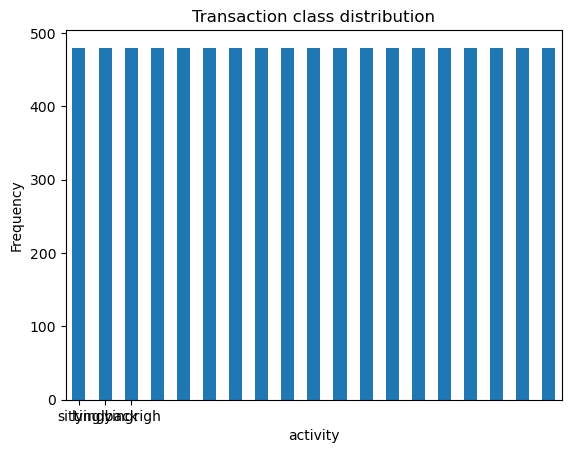

In [85]:
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("activity")
plt.ylabel("Frequency");

In [109]:
abnormal = df[df.Activity == 1]
normal = df[df.Activity == 0]
frauds.shape

AttributeError: 'DataFrame' object has no attribute 'Activity'

In [89]:

normal.shape

(284315, 31)

ValueError: not enough values to unpack (expected 3, got 2)

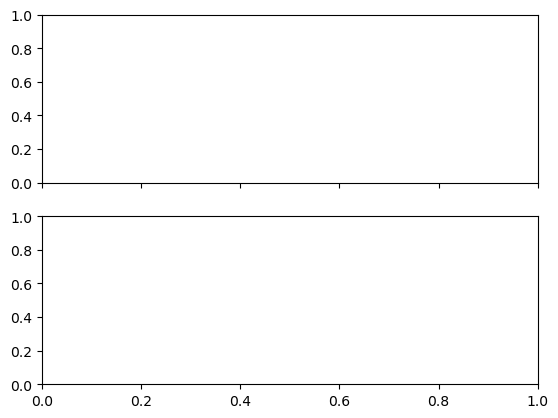

In [101]:
f, (ax1, ax2, ax3) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(sitting.Activity, bins = bins)
ax1.set_title('sitting')

ax2.hist(lyingback.Activity, bins = bins)
ax2.set_title('lyingback')

ax3.hist(lyingrigh.Activity, bins = bins)
ax3.set_title('lyingrigh')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

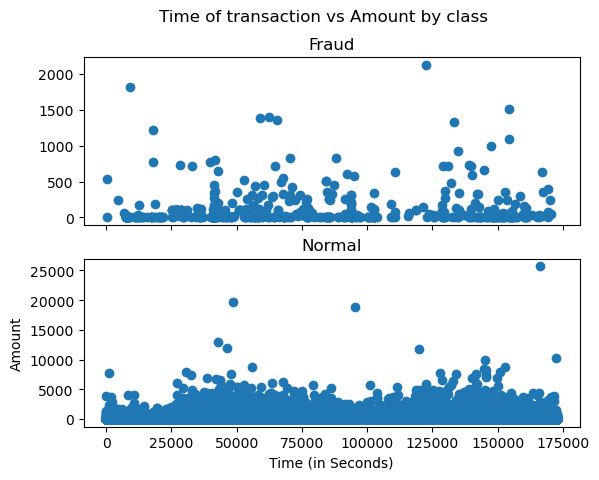

In [92]:
f, (ax1, ax2, ax3) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')



ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [45]:
RANDOM_SEED = 42

In [47]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(227451, 29)

In [49]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 64  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [51]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - loss: 0.9734 - val_loss: 0.7513
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.7615 - val_loss: 0.7368
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.7394 - val_loss: 0.7314
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.7519 - val_loss: 0.7299
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.7460 - val_loss: 0.7288
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.7379 - val_loss: 0.7282
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.7292 - val_loss: 0.7275
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.7510 - val_loss: 0.7275
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.7365 - val_loss: 0.7272
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.7335 - val_loss: 0.7274
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.7433 - val_loss: 0.7269
Epoch 12/50
800/800 ━━━━━━━━━━

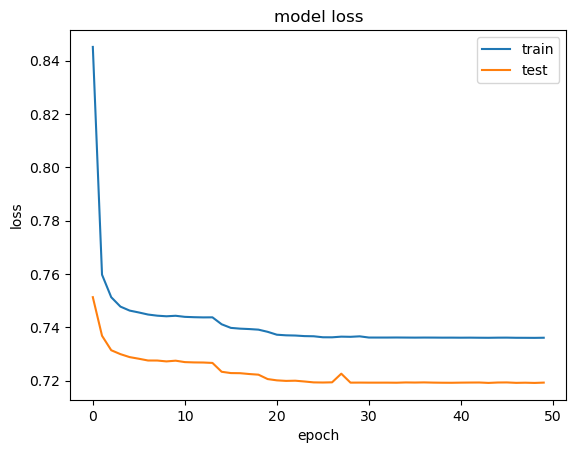

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [55]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.760490,0.001720
std,3.646131,0.041443
min,0.033135,0.000000
25%,0.212974,0.000000
50%,0.369747,0.000000
75%,0.611357,0.000000
max,257.199957,1.000000


In [57]:
error_df.head()

,reconstruction_error,true_class
43428,80.526161,1
49906,0.728796,0
29474,0.187722,0
276481,0.323540,0
278846,0.170571,0


In [59]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

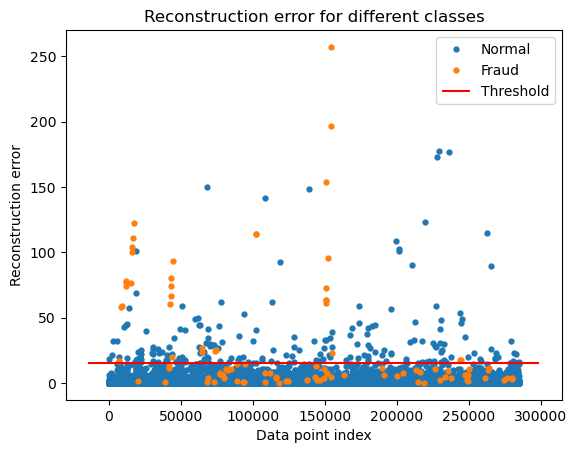

In [61]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

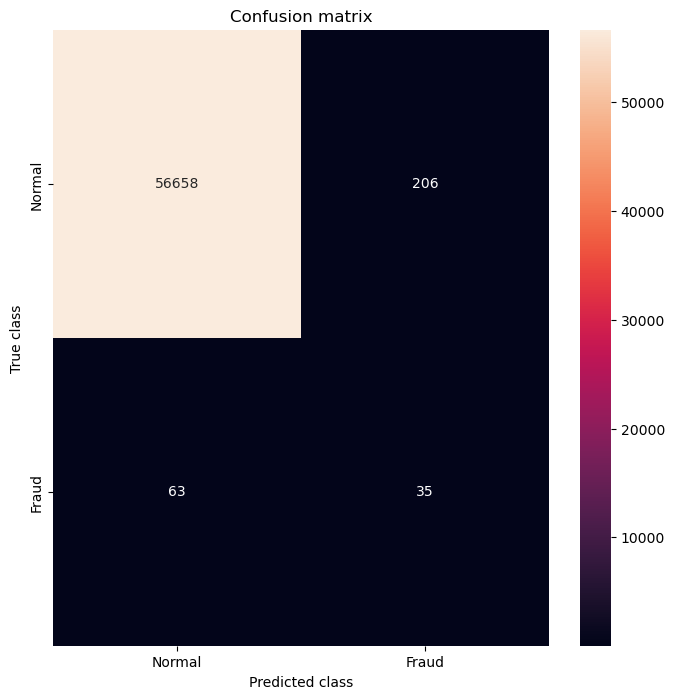

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.15      0.36      0.21        98

    accuracy                           1.00     56962
   macro avg       0.57      0.68      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))